# Project - 2                           ||                        Niladri Sekhar Sardar

## Movielens Case Study

### Analysis Tasks to be performed:



In [1]:
#import library packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import re

In [2]:
#Import the three datasets
movies_df = pd.read_csv('movies.dat', sep='::', names=['MovieID','Title','Genres'], engine='python', header=None)
users_df = pd.read_csv('users.dat', sep='::', names=['UserID','Gender','Age', 'Occupation', 'zip-code'], engine='python', header=None)
ratings_df = pd.read_csv('ratings.dat', sep='::', names=['UserID','MovieID','Rating', 'Timestamp'], parse_dates=['Timestamp'], engine='python', header=None)

In [3]:
movies_df.head(5)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
users_df.head(5)

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings_df.head(5)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
### Analysis Tasks to be performed:
#### * Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [6]:
movie_ratings_df = pd.merge(movies_df, ratings_df, on='MovieID')
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MovieID    1000209 non-null  int64 
 1   Title      1000209 non-null  object
 2   Genres     1000209 non-null  object
 3   UserID     1000209 non-null  int64 
 4   Rating     1000209 non-null  int64 
 5   Timestamp  1000209 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [7]:
movie_ratings_df.head(6)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768


In [8]:
movie_ratings_users_df = pd.merge(movie_ratings_df,users_df,on='UserID')
movie_ratings_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [9]:
movie_ratings_users_df.head(10)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,F,1,10,48067
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,F,1,10,48067
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,F,1,10,48067
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,F,1,10,48067


In [10]:
Master_Data = movie_ratings_users_df.drop( ['zip-code', 'Timestamp'],axis=1)

In [11]:
Master_Data.head(10)

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,F,1,10
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,F,1,10
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,F,1,10
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,F,1,10
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,F,1,10


In [12]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Gender      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [13]:
Master_Data.describe(include='all')

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
count,1.000209e+06,1000209,1000209,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06
unique,NaN,3706,301,NaN,NaN,2,NaN,NaN
top,NaN,American Beauty (1999),Comedy,NaN,NaN,M,NaN,NaN
freq,NaN,3428,116883,NaN,NaN,753769,NaN,NaN
mean,1.865540e+03,NaN,NaN,3.024512e+03,3.581564e+00,NaN,2.973831e+01,8.036138e+00
std,1.096041e+03,NaN,NaN,1.728413e+03,1.117102e+00,NaN,1.175198e+01,6.531336e+00
min,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,1.030000e+03,NaN,NaN,1.506000e+03,3.000000e+00,NaN,2.500000e+01,2.000000e+00
50%,1.835000e+03,NaN,NaN,3.070000e+03,4.000000e+00,NaN,2.500000e+01,7.000000e+00
75%,2.770000e+03,NaN,NaN,4.476000e+03,4.000000e+00,NaN,3.500000e+01,1.400000e+01


In [14]:
Master_Data.shape

(1000209, 8)

<AxesSubplot:>

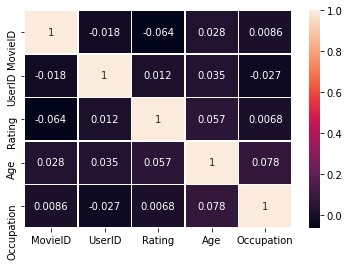

In [15]:
corr = Master_Data.corr()
sns.heatmap(corr,annot= True,linewidths=0.5)

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
### Analysis Tasks to be performed:
#### * Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
       * 1. User Age Distribution

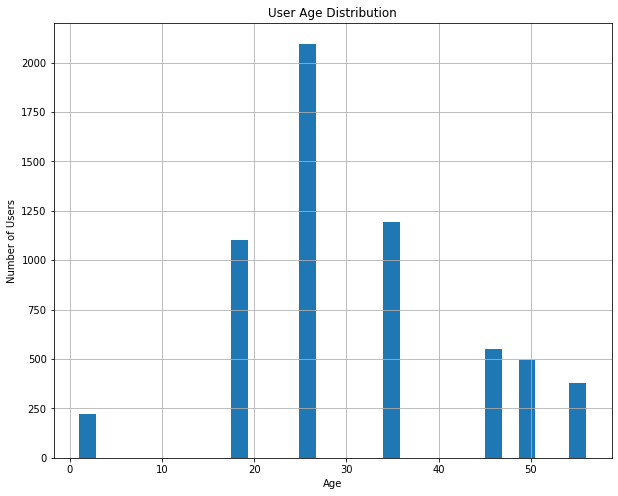

In [16]:
# user age distribution
plt.figure(figsize=(10,8))
users_df.Age.hist(bins=30)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

In [17]:
age_group = users_df.groupby('Age').size()
age_group

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
### Analysis Tasks to be performed:
#### * Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
       * 2. User rating of the movie “Toy Story”

In [18]:
user_group = ratings_df.groupby(['UserID']).size()
user_group.head(10)

UserID
1      53
2     129
3      51
4      21
5     198
6      71
7      31
8     139
9     106
10    401
dtype: int64

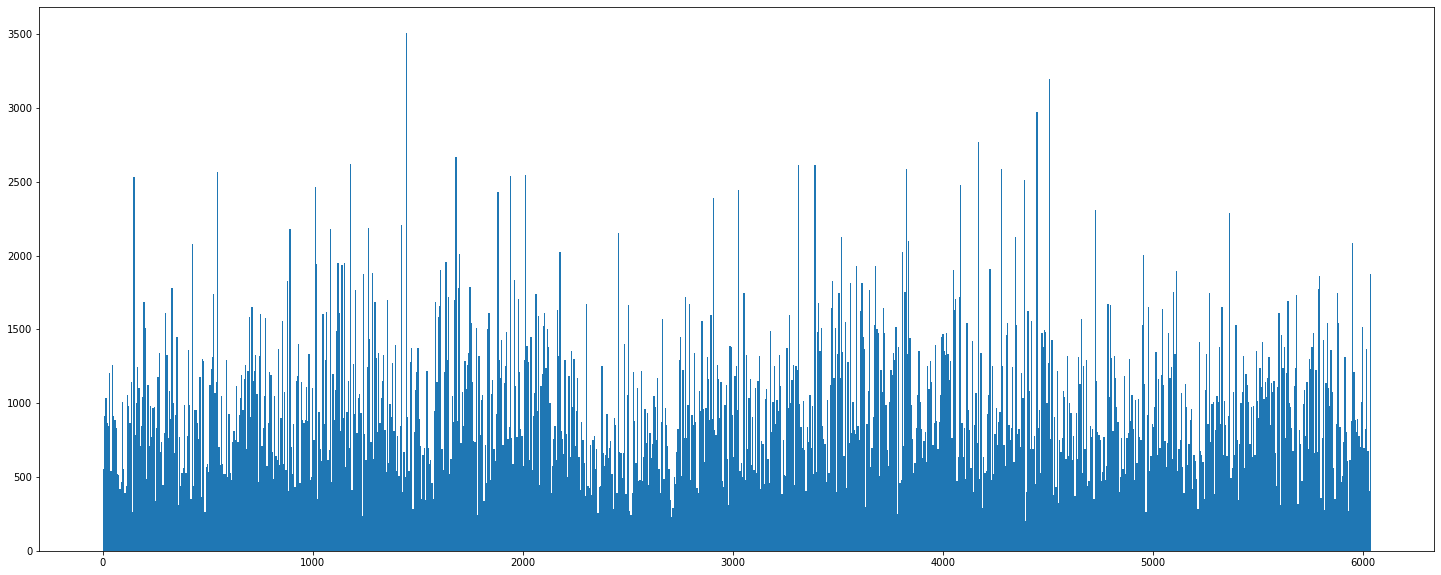

In [19]:
plt.figure(figsize=(25,10))
plt.hist(x=[ratings_df.UserID], bins=1000)
plt.show()

In [20]:
toystory_data = ratings_df[ratings_df.MovieID==1]
toystory_data.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [21]:
toystory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [22]:
def fn(x):
    return re.search("Toy Story".lower(), x.lower())!=None
title = Master_Data.iloc[0].Title
title

'Toy Story (1995)'

In [23]:
re_tit = Master_Data["Title"].apply(fn)
re_tit.head()

0     True
1    False
2    False
3    False
4    False
Name: Title, dtype: bool

In [24]:
toystory = Master_Data[Master_Data["Title"].apply(fn)]
toystory

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,F,1,10
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,M,25,17
...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,F,25,7
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,M,35,18
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,M,1,10
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,F,45,0


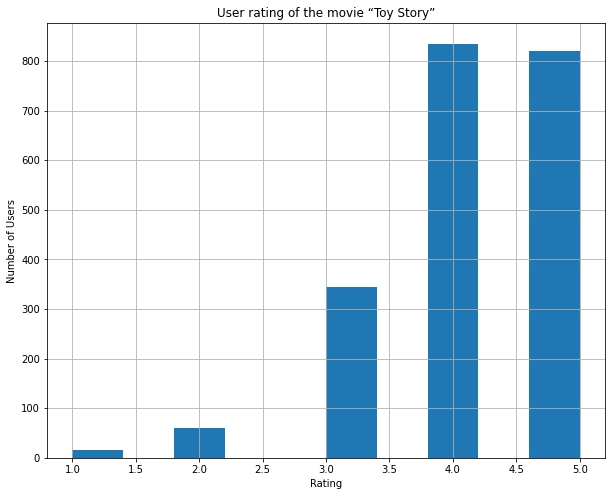

In [25]:
plt.figure(figsize=(10,8))
movies_grouped = movie_ratings_df.groupby('Title')
toy_story = movies_grouped.get_group('Toy Story (1995)')
toy_story['Rating'].hist(bins=10)
plt.title('User rating of the movie “Toy Story”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
### Analysis Tasks to be performed:
#### * Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
    * 3. Top 25 movies by viewership rating

In [26]:
movie_rating = ratings_df.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [27]:
rating_avg = movie_ratings_df.groupby('Title')['Rating'].mean()
rating_avg.head(6)

Title
$1,000,000 Duck (1971)           3.027027
'Night Mother (1986)             3.371429
'Til There Was You (1997)        2.692308
'burbs, The (1989)               2.910891
...And Justice for All (1979)    3.713568
1-900 (1994)                     2.500000
Name: Rating, dtype: float64

In [28]:
rating_avg = rating_avg.sort_values(ascending=False)
rating_avg.head(6)

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Song of Freedom (1936)                5.0
Name: Rating, dtype: float64

In [29]:
rating_count = movie_ratings_df.groupby('Title')['Rating']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [30]:
rating_avg_count = pd.DataFrame(data=rating_avg)
rating_avg_count['number_of_ratings'] = pd.DataFrame(rating_count)
rating_avg_count.head(10)

,Rating,number_of_ratings
Title,,
"Gate of Heavenly Peace, The (1995)",5.0,3
Lured (1947),5.0,1
Ulysses (Ulisse) (1954),5.0,1
Smashing Time (1967),5.0,2
Follow the Bitch (1998),5.0,1
Song of Freedom (1936),5.0,1
Bittersweet Motel (2000),5.0,1
"Baby, The (1973)",5.0,1
One Little Indian (1973),5.0,1


In [31]:
rating_avg_count.describe()

,Rating,number_of_ratings
count,3706.000000,3706.000000
mean,3.238892,269.889099
std,0.672925,384.047838
min,1.000000,1.000000
25%,2.822705,33.000000
50%,3.331546,123.500000
75%,3.740741,350.000000
max,5.000000,3428.000000


In [32]:
filter_data = rating_avg_count[rating_avg_count['number_of_ratings'] < 10]
filter_data[:25]

,Rating,number_of_ratings
Title,,
"Gate of Heavenly Peace, The (1995)",5.000000,3
Lured (1947),5.000000,1
Ulysses (Ulisse) (1954),5.000000,1
Smashing Time (1967),5.000000,2
Follow the Bitch (1998),5.000000,1
Song of Freedom (1936),5.000000,1
Bittersweet Motel (2000),5.000000,1
"Baby, The (1973)",5.000000,1
One Little Indian (1973),5.000000,1


In [33]:
filter_data = rating_avg_count[rating_avg_count['number_of_ratings'] > 10]
filter_data[:25]

,Rating,number_of_ratings
Title,,
Sanjuro (1962),4.608696,69
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510,628
"Shawshank Redemption, The (1994)",4.554558,2227
"Godfather, The (1972)",4.524966,2223
"Close Shave, A (1995)",4.520548,657
"Usual Suspects, The (1995)",4.517106,1783
Schindler's List (1993),4.510417,2304
"Wrong Trousers, The (1993)",4.507937,882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489,470


In [34]:
#The below list shows top 25 movies by viewership data
pd.merge(top_25_movies, movies_df, how='left', left_on=['MovieID'], right_on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


<AxesSubplot:xlabel='MovieID', ylabel='MovieID'>

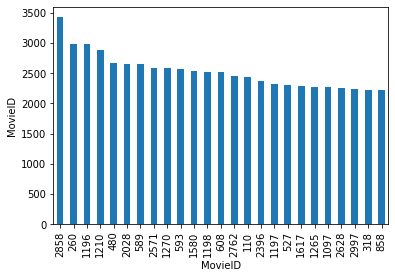

In [35]:
#Top 25 movies by viewership rating
top25_movies = ratings_df.groupby(['MovieID']).size().sort_values(ascending=False)[:25]
top25_movies
plt.ylabel("MovieID")

plt.xlabel("Viewership Count")
top25_movies.plot(kind="bar")

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
### Analysis Tasks to be performed:
#### * Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
    * 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [36]:
user_id2696 = movie_ratings_users_df[movie_ratings_users_df['UserID'] == 2696]
user_id2696.head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210


In [37]:
user_id2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


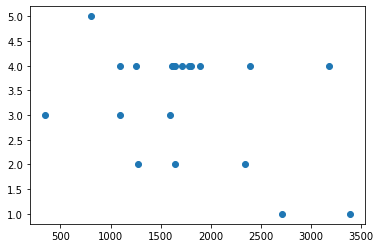

In [38]:
# plotting the above data
plt.scatter(x=user_id2696['MovieID'], y=user_id2696['Rating'])
plt.show()

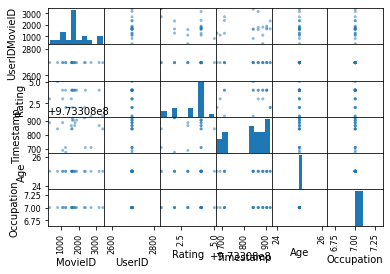

In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(user_id2696)
plt.show()

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
## Analysis Tasks to be performed:
### * Feature Engineering:
   ####   * Use column genres:

          * 1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [48]:
movie_ratings_df['Genres'].value_counts().head()

Comedy            116883
Drama             111423
Comedy|Romance     42712
Comedy|Drama       42245
Drama|Romance      29170
Name: Genres, dtype: int64

In [49]:
movie_ratings_df['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [50]:
Genres_list = movie_ratings_df.Genres.tolist()
genre_list = []
i = 0
while(i<len(Genres_list)):
    genre_list+= Genres_list[i].split('|')
    i+=1

In [51]:
unique_gen = list(set(genre_list))
print(unique_gen)
print()
print("Length of the unique Genre : ",len(unique_gen))

['Adventure', 'War', "Children's", 'Animation', 'Sci-Fi', 'Musical', 'Film-Noir', 'Comedy', 'Action', 'Romance', 'Thriller', 'Western', 'Fantasy', 'Drama', 'Crime', 'Horror', 'Documentary', 'Mystery']

Length of the unique Genre :  18


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
## Analysis Tasks to be performed:
### * Feature Engineering:
   ####   * Use column genres:

          * 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [44]:
movie_ratings_selected_df = movie_ratings_users_df[['Gender','Age','Occupation','Rating','Genres']]

In [45]:
movie_ratings_selected_df.head()

,Gender,Age,Occupation,Rating,Genres
0,F,1,10,5,Animation|Children's|Comedy
1,F,1,10,5,Animation|Children's|Musical|Romance
2,F,1,10,5,Drama
3,F,1,10,4,Action|Adventure|Fantasy|Sci-Fi
4,F,1,10,5,Drama|War


In [58]:
new_data = pd.concat([movie_ratings_users_df,movie_ratings_users_df.Genres.str.get_dummies()], axis=1)
print(new_data.columns)

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [59]:
new_data.head(6)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_new = new_data.drop(['Title','zip-code','Timestamp','Genres'],axis=1)
df_new.head()

,MovieID,UserID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,F,1,10,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,48,1,5,F,1,10,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,150,1,5,F,1,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,1,4,F,1,10,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,527,1,5,F,1,10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
print(df_new.columns)

Index(['MovieID', 'UserID', 'Rating', 'Gender', 'Age', 'Occupation', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
## Analysis Tasks to be performed:
### * Feature Engineering:
   ####   * Use column genres:
    * 3. Determine the features affecting the ratings of any particular movie.

In [64]:
df_new.Gender = pd.get_dummies(df_new.Gender)

In [65]:
x = df_new.drop(['UserID','MovieID','Rating'],axis=1)
x.shape

(1000209, 21)

In [66]:
print('The features affecting the ratings of any particular movie:')
print()
print(x.columns)

The features affecting the ratings of any particular movie:

Index(['Gender', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [67]:
y = df_new.Rating
y.shape

(1000209,)

In [68]:
x.Occupation.value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

In [69]:
x = x.join(pd.get_dummies(x.Occupation,prefix='Occupation'))
x.head(),x.columns

(   Gender  Age  Occupation  Action  Adventure  Animation  Children's  Comedy  \
 0       1    1          10       0          0          1           1       1   
 1       1    1          10       0          0          1           1       0   
 2       1    1          10       0          0          0           0       0   
 3       1    1          10       1          1          0           0       0   
 4       1    1          10       0          0          0           0       0   
 
    Crime  Documentary  ...  Occupation_11  Occupation_12  Occupation_13  \
 0      0            0  ...              0              0              0   
 1      0            0  ...              0              0              0   
 2      0            0  ...              0              0              0   
 3      0            0  ...              0              0              0   
 4      0            0  ...              0              0              0   
 
    Occupation_14  Occupation_15  Occupation_16  Occup

<AxesSubplot:>

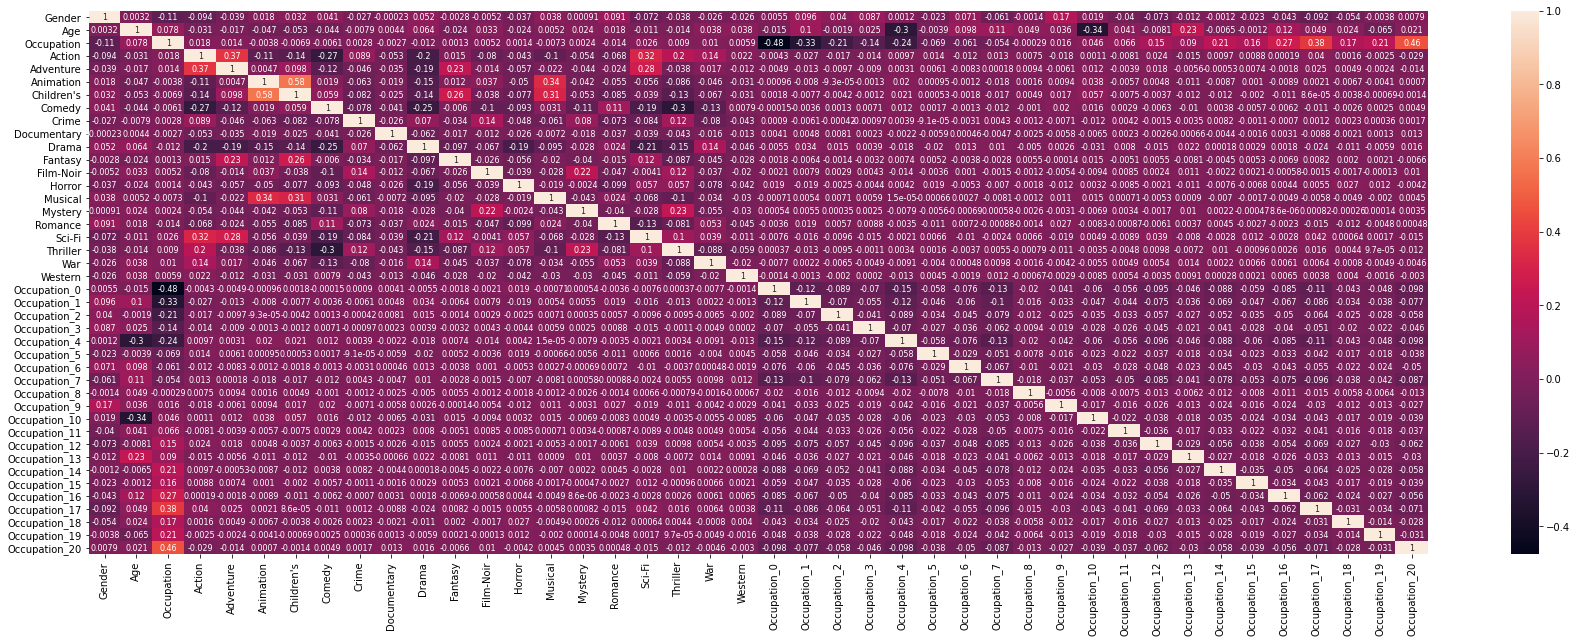

In [77]:
plt.figure(figsize=(30,10))
corr=x.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':8})

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
## Analysis Tasks to be performed:
### * Feature Engineering:
   ####   * Use column genres:
    * 4. Develop an appropriate model to predict the movie ratings

In [81]:
# create a Python list of feature names
feature_cols = ['Age', 'Occupation']


In [84]:
# use the list to select a subset of the original DataFrame
X = Master_Data[feature_cols]

# select a Series from the DataFrame
y = Master_Data.Rating

In [85]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)


In [87]:
# compute the RMSE of our predictions
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.1153284258531615
